In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.interpolate import RegularGridInterpolator
#from rate_model import rate_model
from time_dependent_model import rate_model
import h5py
import warnings
import pandas as pd
warnings.simplefilter('always', DeprecationWarning)
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


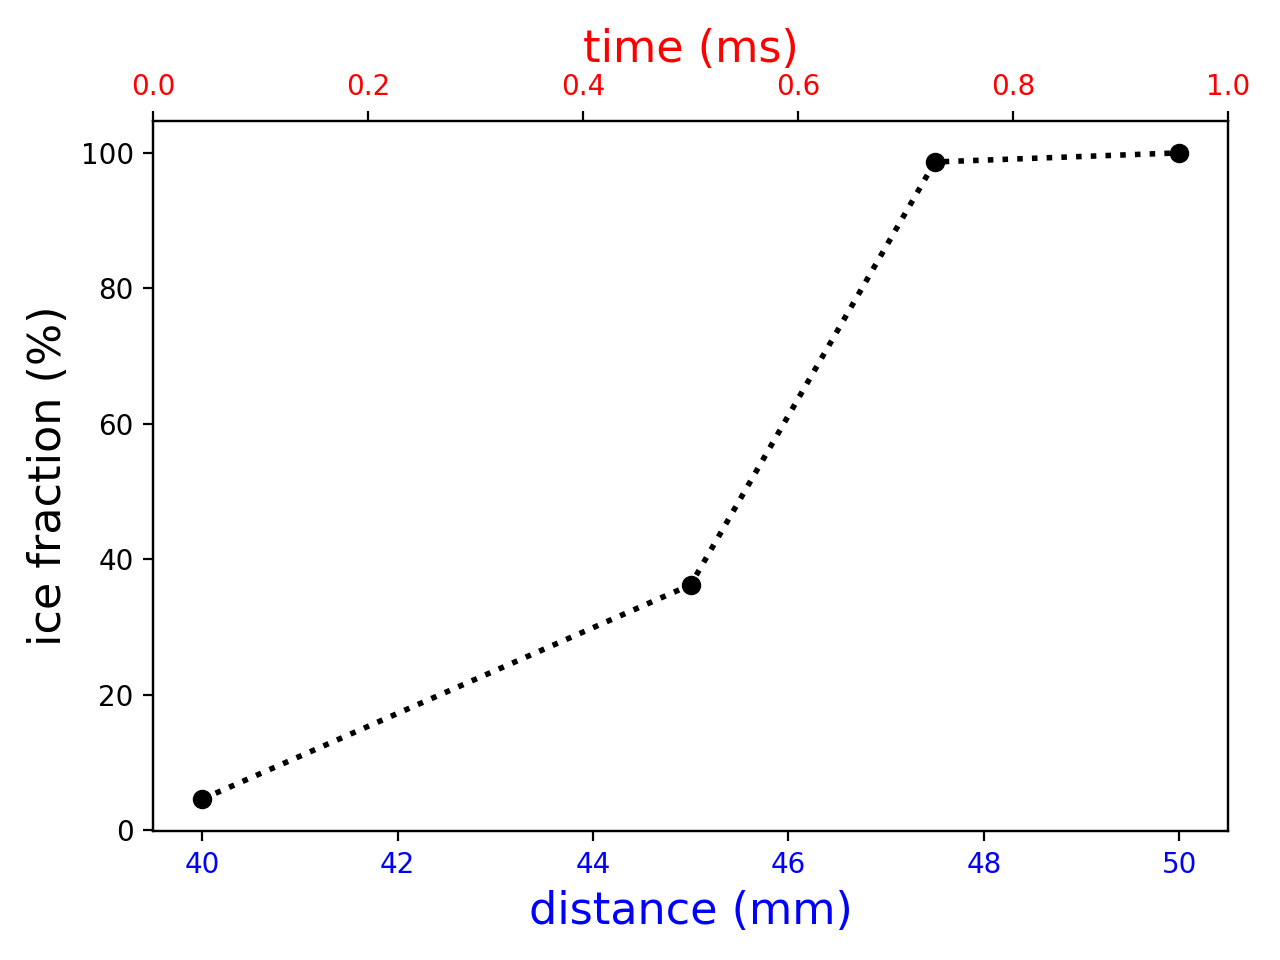

In [2]:
droplets = np.array([633, 566, 298, 325])
frozen = np.array([29, 205, 294, 325])
distance = np.array([40, 45, 47.5, 50])    #mm
percent_frozen = frozen/droplets*100.00
fraction = frozen/droplets
velocity = 11.85866778 #m/s
time = distance/velocity

fig, ax1 = plt.subplots()

ax1.plot(distance, percent_frozen, 'ko:', lw=2)
ax1.set_xlabel('distance (mm)', fontsize=16, color="blue")
for label in ax1.get_xticklabels():
    label.set_color("blue")
    
ax2 = ax1.twiny()
#ax2.plot(time, percent_frozen, lw=2, color="red")
ax2.set_xlabel('time (ms)', fontsize=16, color="red")
for label in ax2.get_xticklabels():
    label.set_color("red")

ax1.set_ylabel('ice fraction (%)', fontsize = 16)
plt.tight_layout()
plt.show()


In [12]:
ax_arr = np.array([40.,42.,44.,46.,48.,50.])
t_ax = np.round(ax_arr/velocity, 2)

<IPython.core.display.Javascript object>


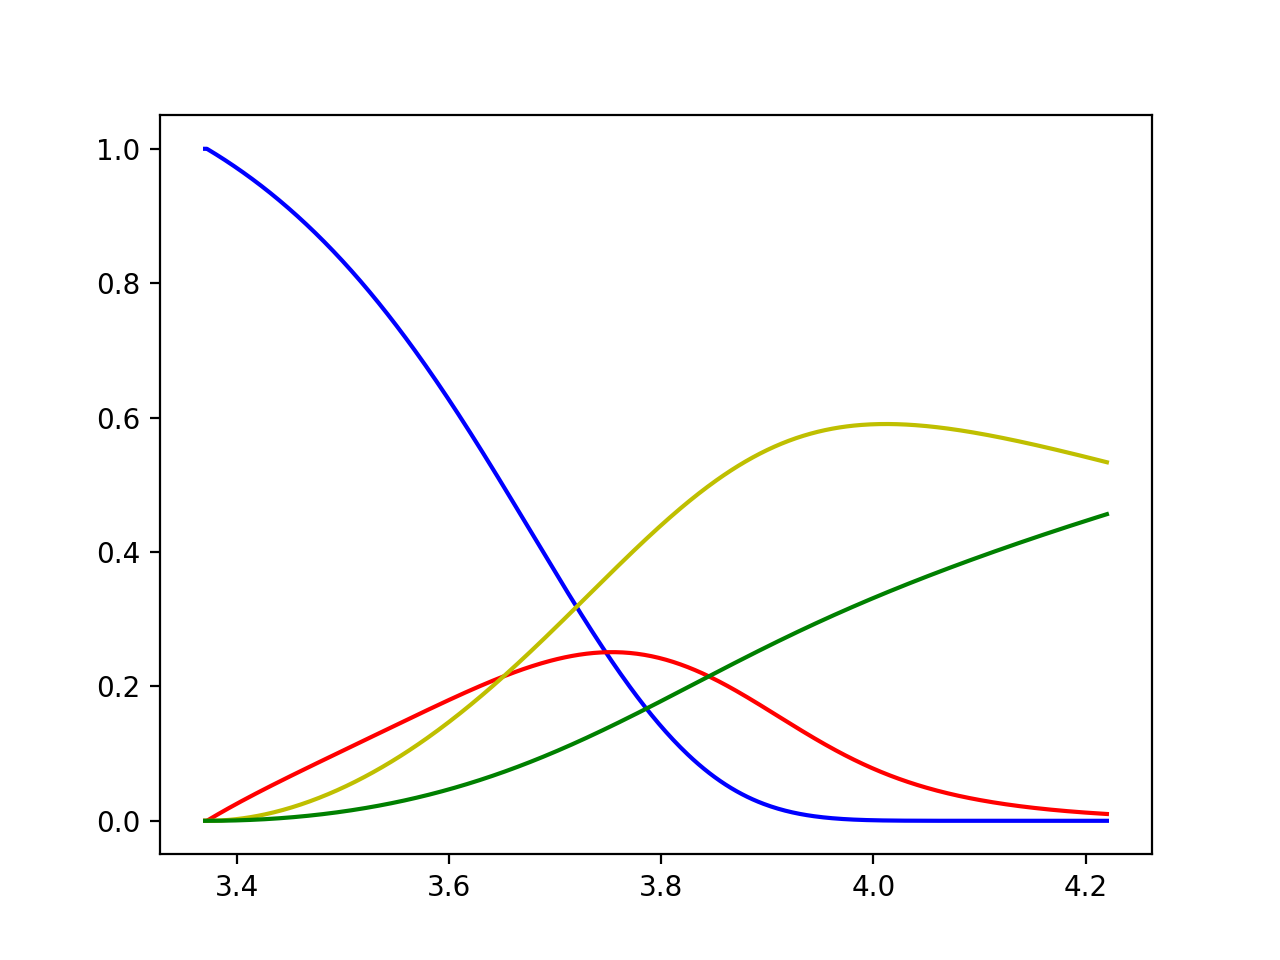

In [13]:
t_model = np.linspace(3.37, 4.22, num=500)
#init = np.array([0.95418641,0.01895735,0.02369668,0.00315956])
init = np.array([1.0, 0., 0., 0.])
k_vals = np.array([7.488073, 0.8920651, 1.74072257])
#J_vals = (3.2048763669424476, 29.905670049402502) # m, b, linear fit to ln(J) vs time [ms], all points
J_vals = (6.103996016694045, 19.67070822484957) # m, b, linear fit to ln(J) vs time [ms], first 2 points
#w,m,b,f = rate_model(init, k_vals, 5.85511584e+18, 3.128020134848296e-18, t_model)
w,m,b,f = rate_model(init, k_vals, J_vals, 3.128020134848296e-18, t_model)

plt.figure()
plt.plot(t_model, w, 'b')
plt.plot(t_model, m, 'r')
plt.plot(t_model, b, 'y')
plt.plot(t_model, f, 'g')

<IPython.core.display.Javascript object>


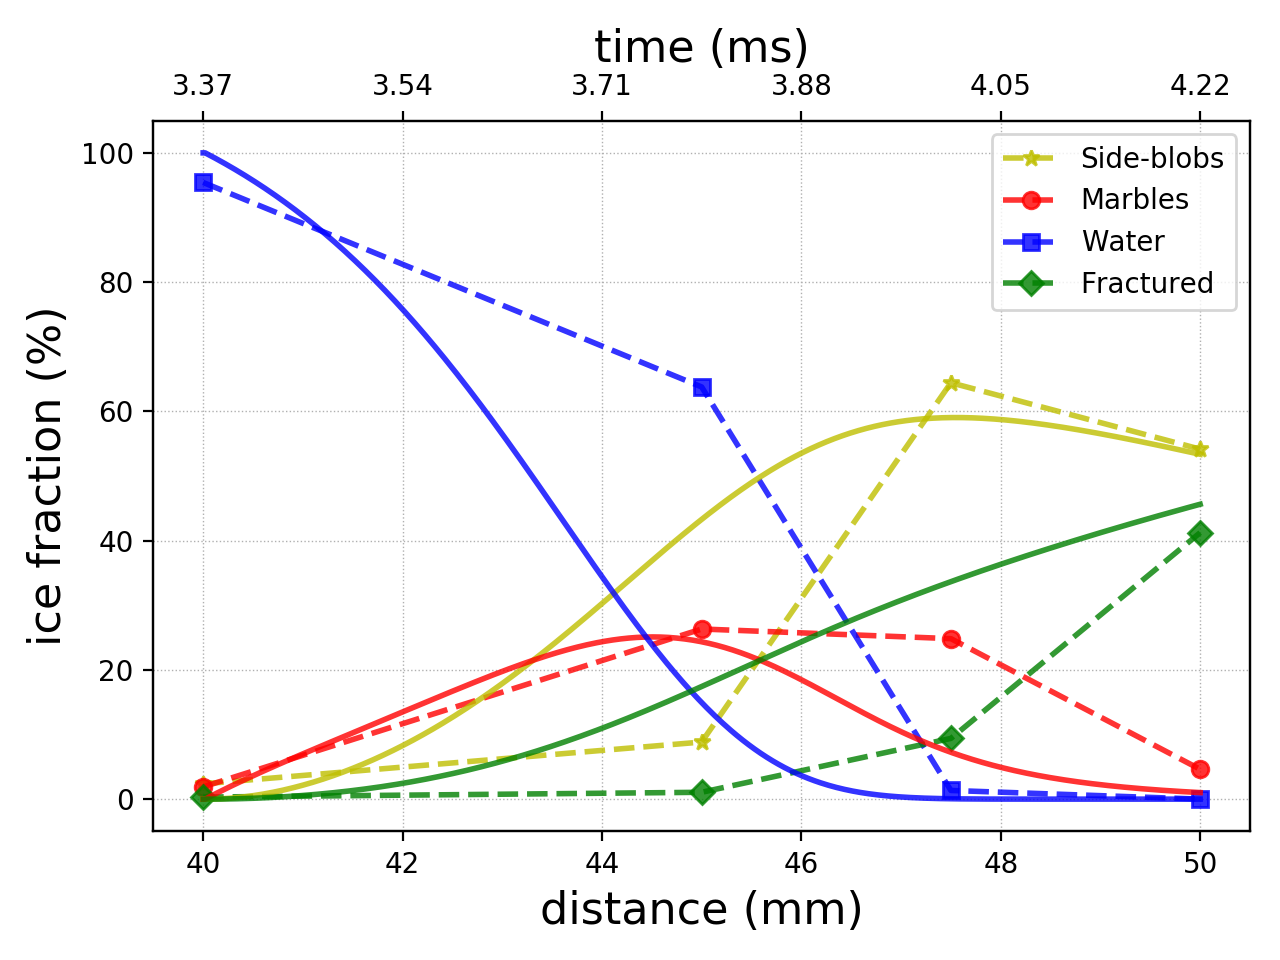

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [14]:
Sideblobs = np.array([15, 50, 192, 176])
Marbles = np.array([12, 149, 74, 15])
water= np.array([604, 361, 4, 0])
Fractured = np.array([2, 6, 28, 134])

fig, ax1 = plt.subplots()

ax1.plot(distance, Sideblobs/droplets*100.0, 'y*--', lw=2, label = 'Side-blobs', alpha=0.8)
ax1.plot(distance, Marbles/droplets*100.0, 'ro--', lw=2, label = 'Marbles', alpha=0.8)
ax1.plot(distance, water/droplets*100.0, 'bs--', lw=2, label = 'Water', alpha=0.8)
ax1.plot(distance, Fractured/droplets*100.0, 'gD--', lw=2, label= 'Fractured', alpha=0.8)


ax1.set_xlabel('distance (mm)', fontsize=16)
for label in ax1.get_xticklabels():
    label.set_color("k")
 
    
ax2 = ax1.twiny()
ax2.plot(time, percent_frozen, lw=0.000001, alpha=0.00001)
ax2.plot(t_model, b*100., 'y-', lw=2, alpha=0.8)
ax2.plot(t_model, m*100., 'r-', lw=2, alpha=0.8)
ax2.plot(t_model, w*100., 'b-', lw=2, alpha=0.8)
ax2.plot(t_model, f*100., 'g-', lw=2, alpha=0.8)
ax2.set_xlabel('time (ms)', fontsize=16)
for label in ax2.get_xticklabels():
    label.set_color("k")

ax2.set_xticks(t_ax) 
ax2.set_xticklabels(t_ax, fontsize=10)

ax1.set_ylabel('ice fraction (%)', fontsize = 16)
ax1.legend(loc='upper right',fontsize=10)
ax1.grid(linestyle='dotted', lw=0.5)
plt.tight_layout()
plt.savefig('/Users/niloo/Desktop/manuscript/ice_fraction/test_icefractions.eps')
plt.show()


In [ ]:
def read_hdf5(path, filename):
    f = h5py.File('{0}/{1}'.format(path, filename), 'r')
    return f['data']['time'], f['data']['Tave']

def T_at_distance(distance, velocity, droplet_size, T_function):
    '''Distance in m, velocity in m/s, droplet_size is diameter in micrometer'''
    time = np.divide(distance, velocity)
    temperature = T_function([droplet_size, time], method='linear')
    return temperature

def T_at_time(time, droplet_size, T_function):
    '''Time in s, droplet_size is diameter in micrometer'''
    temperature = T_function([droplet_size, time], method='linear')
    return temperature


#These are the sizes that are in the folder of hdf5 files. Must have the same timesteps
sizes = [3, 5, 10, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]

#sizes is the x 
x = sizes

# y is the timesteps, and this is taken from the file t_calib_22.h5
time, _ = read_hdf5('/Users/niloo/Desktop/pressure_test/temperature_calib', 't_calib_18.h5')
y = list(time[:])  

#Create an empy matrix with the size of the sizes and times
temperatures = np.zeros([len(x), len(y)])

#Filling the matrix with actual values measured.
for size_index, size_value in enumerate(sizes):
    _, temperatures[size_index] = read_hdf5(
        '/Users/niloo/Desktop/pressure_test/temperature_calib', 't_calib_{0}.h5'.format(size_value))

# This is a function returned by the RegularGridInterpolator
#interpolate_T = interp2d(xx, yy, temperatures, kind='linear',bounds_error=True)
interpolate_T = RegularGridInterpolator((x, y), temperatures)

In [ ]:
time = distance/velocity/1000

In [ ]:
temperatures = [T_at_time(x, 18.145, interpolate_T) for x in time]

In [ ]:
fig, ax = plt.subplots()
time = distance*10**-3/velocity #ms
Volume = 4.*np.pi*(18.145/2.)**3/3. #cubic um
Volume = Volume*10**-18
J_list = np.zeros(len(distance)-1)
for k in range(len(fraction)):
    if k!=0:
        J_list[k-1]= -np.log((1-fraction[k])/(1-fraction[k-1]))/((time[k]-time[k-1])*Volume)
temperature_shifted = [np.average([temperatures[n+1],temperatures[n]]) for n in range(len(temperatures)-1)]

ax.plot(temperature_shifted, J_list, 'kx:', label = '18.15 $\mu$m, v = 11.85 m/s')
ax.set_ylabel('$J (m^{-3}s^{-1})$', fontsize = 12)
ax.set_xlabel('T (K)', fontsize = 12)
ax.legend(loc='upper right',fontsize=10)
ax.grid(linestyle='dotted')
ax.grid(linestyle='dotted',which='minor',alpha =0.2)
plt.tight_layout()
plt.show()

In [ ]:
J_list

In [ ]:
# new expression to calculate Nucleation rate 
J = -np.gradient(np.log(1-fice), time)/V